<a href="https://colab.research.google.com/github/jhlopesalves/Datacamp-Notebooks/blob/main/Python/Intro%20to%20Seaborn/introduction_to_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [5]:
# Ensure the data directory exists
os.makedirs('data', exist_ok=True)

# Define sources: URLs that point to CSVs and ZIPs
urls = [
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/young-people-survey-responses.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/mpg.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/student-alcohol-consumption.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/student-mat.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Seaborn/data/student-por.csv",
    "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv"
]

# Run wget in quiet mode for each URL
for url in urls:
    # -q suppresses all output; -P directs output into 'data/' directory
    !wget -q -P data/ "{url}"

# Single success message
print("All files downloaded successfully.")

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


All files downloaded successfully.


'wget' is not recognized as an internal or external command,
operable program or batch file.


### Hue and count plots
Let's continue exploring our dataset from students in secondary school by looking at a new variable. The `"school"` column indicates the initials of which school the student attended - either `"GP"` or `"MS"`.

In the last exercise, we created a scatter plot where the plot points were colored based on whether the student lived in an urban or rural area. How many students live in urban vs. rural areas, and does this vary based on what school the student attends? Let's make a count plot with subgroups to find out.

In [6]:
# Load each subject file (semicolon-separated) into DataFrames
mat = pd.read_csv('data/student-mat.csv', sep=';')
por = pd.read_csv('data/student-por.csv', sep=';')

# Concatenate along rows to get 1 044 records
df = pd.concat([mat, por], ignore_index=True)

# Drop job-related and guardian columns to match DataCamp’s 29 columns
df.drop(columns=['Mjob', 'Fjob', 'reason', 'guardian'], inplace=True)

# Rename and recode 'address' → 'location'
df.rename(columns={'address': 'location'}, inplace=True)
df['location'] = df['location'].map({'U': 'Urban', 'R': 'Rural'})

# Rename and recode 'studytime' → 'study_time' with textual bands
study_map = {
    1: '<2 hours',
    2: '2 to 5 hours',
    3: '5 to 10 hours',
    4: '>10 hours'
}
df.rename(columns={'studytime': 'study_time'}, inplace=True)
df['study_time'] = df['study_time'].map(study_map)

# Reorder columns to match DataCamp’s .head() layout
desired_order = [
    'school','sex','age','famsize','Pstatus','Medu','Fedu','traveltime',
    'failures','schoolsup','famsup','paid','activities','nursery','higher',
    'internet','romantic','famrel','freetime','goout','Dalc','Walc','health',
    'absences','G1','G2','G3','location','study_time'
]
student_data = df[desired_order]

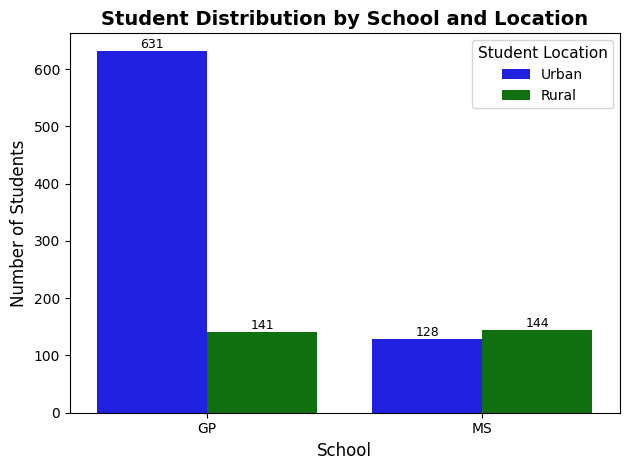

In [22]:
fig, ax = plt.subplots()

# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x="school", data=student_data, hue="location", palette=palette_colors)

# Set descriptive title and labels
ax.set_title("Student Distribution by School and Location", fontsize=14, fontweight='bold')
ax.set_xlabel("School", fontsize=12)
ax.set_ylabel("Number of Students", fontsize=12)

# Improve legend
ax.legend(title="Student Location", title_fontsize=11, fontsize=10, loc='upper right')

# Add value labels on top of bars for better readability
for container in ax.containers:
    ax.bar_label(container, fontsize=9)

plt.tight_layout()
plt.show()

### Creating subplots with col and row
We've seen in prior exercises that students with more absences (`"absences"`) tend to have lower final grades (`"G3"`). Does this relationship hold regardless of how much time students study each week?

To answer this, we'll look at the relationship between the number of absences that a student has in school and their final grade in the course, creating separate subplots based on each student's weekly study time (`"study_time"`).

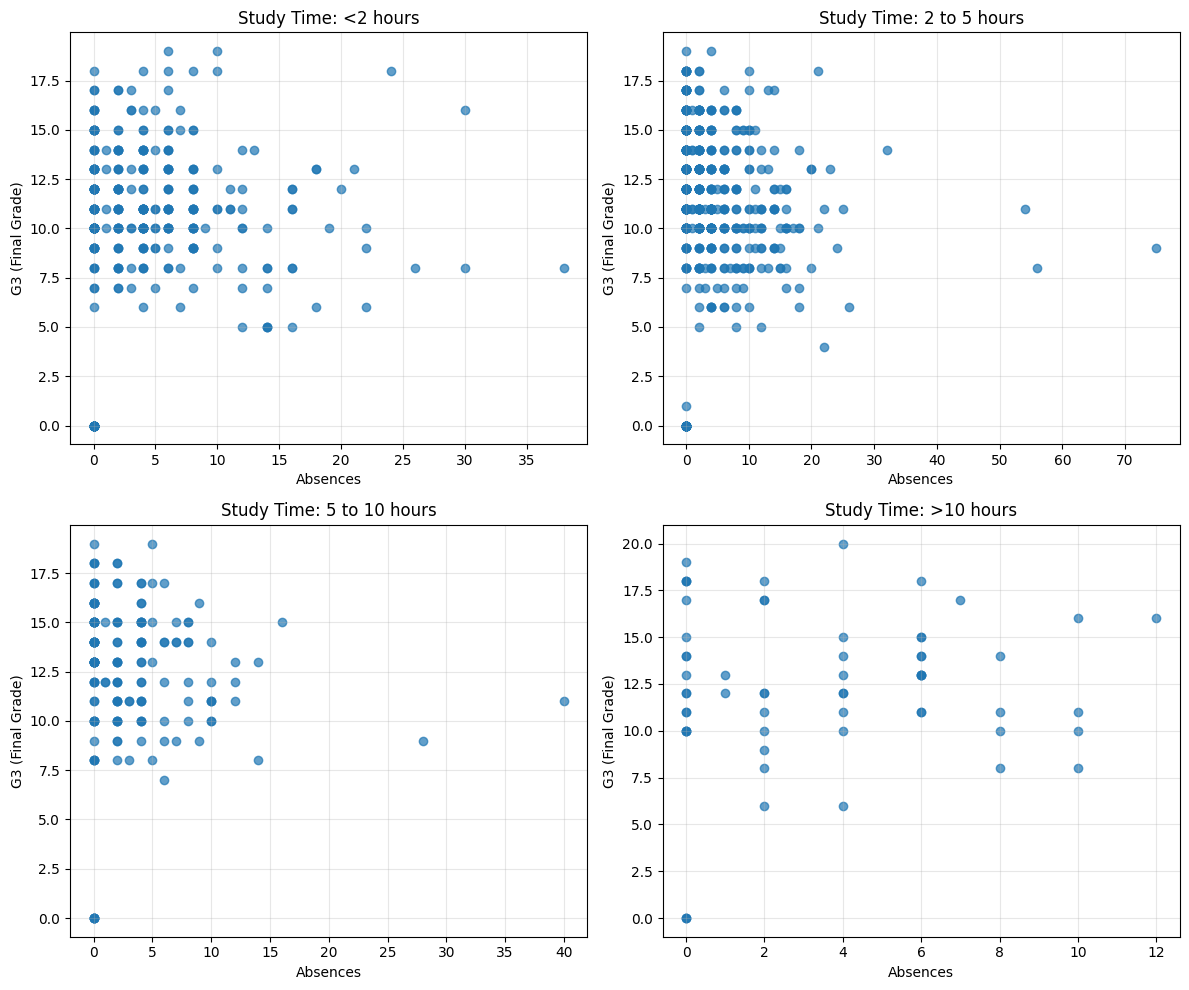

In [25]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Get unique study time categories in the desired order
study_time_order = ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"]

# Create scatter plots for each study time category
for i, study_time in enumerate(study_time_order):
    subset = student_data[student_data['study_time'] == study_time]
    axes[i].scatter(subset['absences'], subset['G3'], alpha=0.7)
    axes[i].set_title(f'Study Time: {study_time}')
    axes[i].set_xlabel('Absences')
    axes[i].set_ylabel('G3 (Final Grade)')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

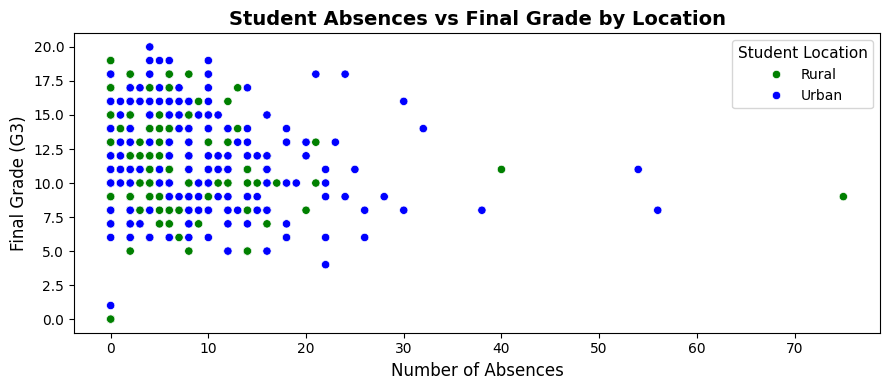

In [ ]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

fig, ax = plt.subplots(figsize=(9, 4))

# Create a scatter plot of absences vs. final grade
sns.scatterplot(x="absences",
                y="G3",
                data=student_data,
                hue="location",
                hue_order=["Rural", "Urban"],
                palette=palette_colors,
                ax=ax)

# Add title and labels
ax.set_title("Student Absences vs Final Grade by Location", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Absences", fontsize=12)
ax.set_ylabel("Final Grade (G3)", fontsize=12)

# Improve legend
ax.legend(title="Student Location", title_fontsize=11, fontsize=10)

plt.tight_layout()
plt.show()

### Seaborn built-in dataset `tips`

- total_bill: The total bill amount in dollars.
- tip: The tip amount in dollars.
- sex: The gender of the person who paid the bill (Male or Female).
- smoker: Whether the party included smokers (Yes or No).
- day: The day of the week (Sun, Sat, Thur, Fri).
- time: The time of the day (Dinner or Lunch).
- size: The number of people in the party.

In [10]:
# Load the built-in Seaborn 'tips' dataset
tips = sns.load_dataset("tips")
# Display the first 5 rows to examine the data structure
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Changing the size of scatter plot points
In this exercise, we'll explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, the number of miles per gallon (`"M.P.G."`) it achieves, the power of its engine (measured in `"horsepower"`), and its country of origin.

What is the relationship between the power of a car's engine (`"horsepower"`) and its fuel efficiency (`"mpg"`)? And how does this relationship vary by the number of cylinders (`"cylinders"`) the car has? Let's find out.

In [11]:
# Load the MPG (Miles Per Gallon) dataset from CSV file
# This dataset contains car performance metrics including fuel efficiency and engine specifications
mpg = pd.read_csv("data/mpg.csv")

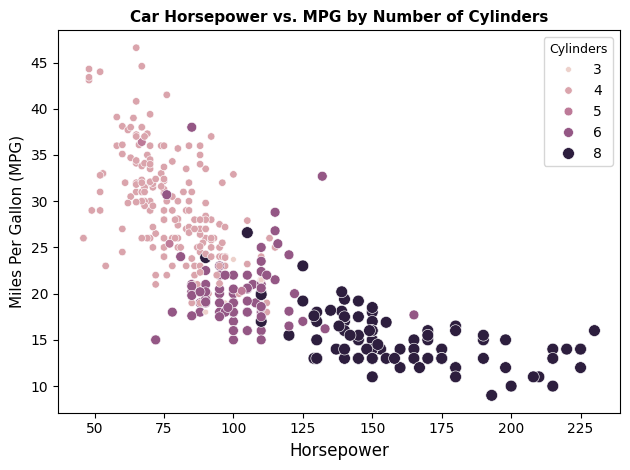

In [41]:
fig, ax = plt.subplots()

# Dual encoding: Using both size and color helps distinguish categories clearly
# Numeric to visual mapping: Automatic scaling of point sizes based on data values
sns.scatterplot(x="horsepower", 
                y="mpg",
                data=mpg, 
                size="cylinders",  # Point size varies with cylinder count
                hue="cylinders",   # Color varies with cylinder count
                ax=ax)

# Add title and labels
ax.set_title("Car Horsepower vs. MPG by Number of Cylinders", fontsize=11, fontweight='bold')
ax.set_xlabel("Horsepower", fontsize=12)
ax.set_ylabel("Miles Per Gallon (MPG)", fontsize=11)

# Place legend inside the plot area in the upper left corner
ax.legend(title="Cylinders", title_fontsize=9, fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()

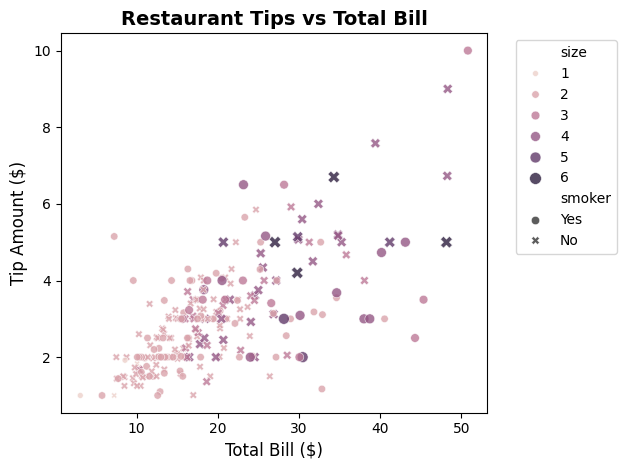

In [44]:
fig, ax = plt.subplots()

# size parameter: Maps point size to a numeric variable (party size)
# hue parameter: Maps color to the same variable for redundant encoding
# style parameter: Maps point markers to a categorical variable (smoker status)
# alpha parameter: Controls transparency for better visualization of overlapping points
# Multiple aesthetics: Encoding multiple variables simultaneously in one plot
sns.scatterplot(x="total_bill",
                y="tip",
                data=tips,
                size="size",      # Point size varies with party size
                hue="size",       # Color also varies with party size
                style="smoker",   # Point shape varies with smoker status
                alpha=0.8,        # Slight transparency
                ax=ax)            # Use the created axes

# Add title and labels
ax.set_title("Restaurant Tips vs Total Bill", 
             fontsize=14, fontweight='bold')
ax.set_xlabel("Total Bill ($)", fontsize=12)
ax.set_ylabel("Tip Amount ($)", fontsize=12)

# Improve legend positioning
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

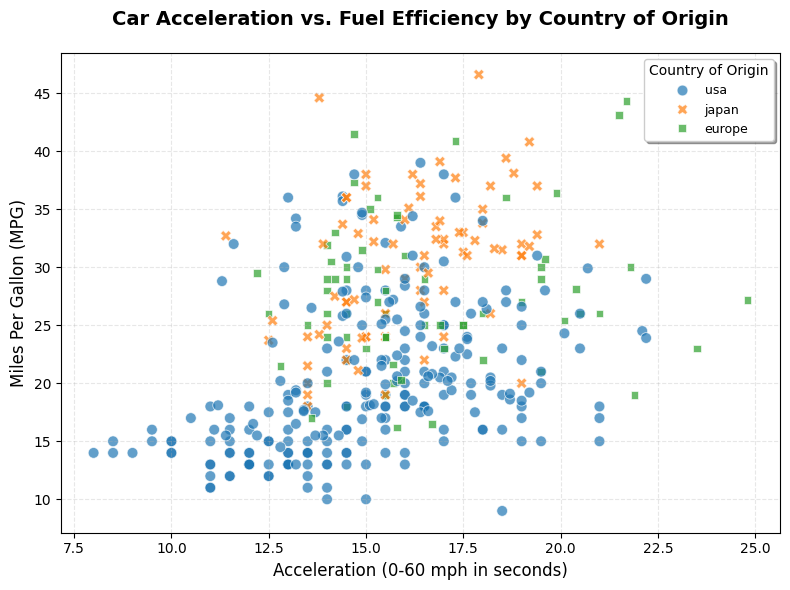

In [48]:
# Create a figure and axes object for better control
fig, ax = plt.subplots(figsize=(8, 6))

# Create a scatter plot using object-oriented approach
sns.scatterplot(x="acceleration",
                y="mpg", 
                data=mpg,
                hue="origin",     # Color by country of origin
                style="origin",   # Different markers for each country
                s=60,             # Adjust point size
                alpha=0.7,        # Add transparency
                ax=ax)

# Add title and labels
ax.set_title("Car Acceleration vs. Fuel Efficiency by Country of Origin", 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("Acceleration (0-60 mph in seconds)", fontsize=12)
ax.set_ylabel("Miles Per Gallon (MPG)", fontsize=12)

# Improve legend
ax.legend(title="Country of Origin", 
          title_fontsize=10, 
          fontsize=9, 
          loc='upper right',
          frameon=True,
          fancybox=True,
          shadow=True)

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')

# Adjust layout
plt.tight_layout()
plt.show()

### Interpreting line plots
In this exercise, we'll continue to explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, its fuel efficiency (measured in "miles per gallon" or "M.P.G"), and its country of origin (USA, Europe, or Japan).

How has the average miles per gallon achieved by these cars changed over time? Let's use line plots to find out!

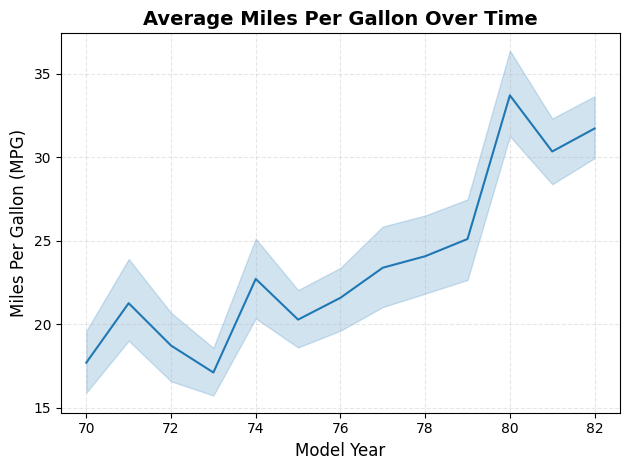

In [49]:
# Create a figure and axes object for better control
fig, ax = plt.subplots()

# Create line plot using object-oriented approach
sns.lineplot(x="model_year", y="mpg", data=mpg, ax=ax)

# Add title and labels
ax.set_title("Average Miles Per Gallon Over Time", fontsize=14, fontweight='bold')
ax.set_xlabel("Model Year", fontsize=12)
ax.set_ylabel("Miles Per Gallon (MPG)", fontsize=12)

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

### Visualizing standard deviation with line plots
In the last exercise, we looked at how the average miles per gallon achieved by cars has changed over time. Now let's use a line plot to visualize how the distribution of miles per gallon has changed over time.

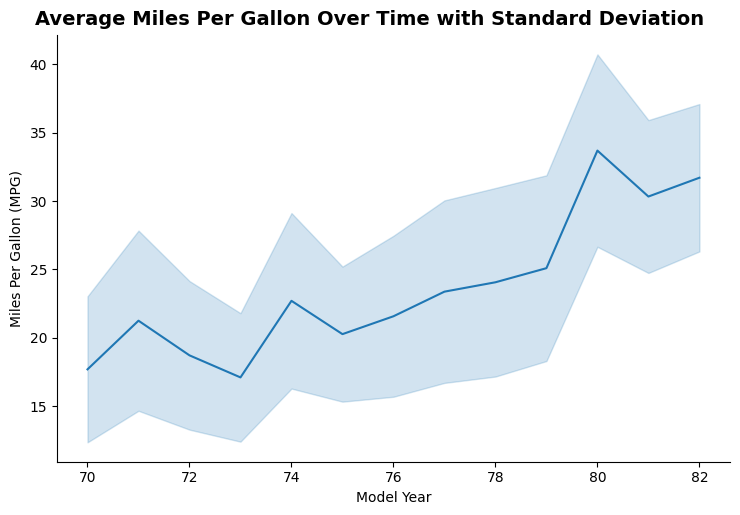

In [53]:
# Create line plot with standard deviation using relplot
g = sns.relplot(x="model_year", y="mpg",
                data=mpg, kind="line", errorbar="sd",
                height=5, aspect=1.5)

# Add title and labels using the FacetGrid object
g.fig.suptitle("Average Miles Per Gallon Over Time with Standard Deviation", 
               fontsize=14, fontweight='bold', y=1.02)
g.set_axis_labels("Model Year", "Miles Per Gallon (MPG)")

# Show plot
plt.show()


### Plotting subgroups in line plots
Let's continue to look at the mpg dataset. We've seen that the average miles per gallon for cars has increased over time, but how has the average horsepower for cars changed over time? And does this trend differ by country of origin?

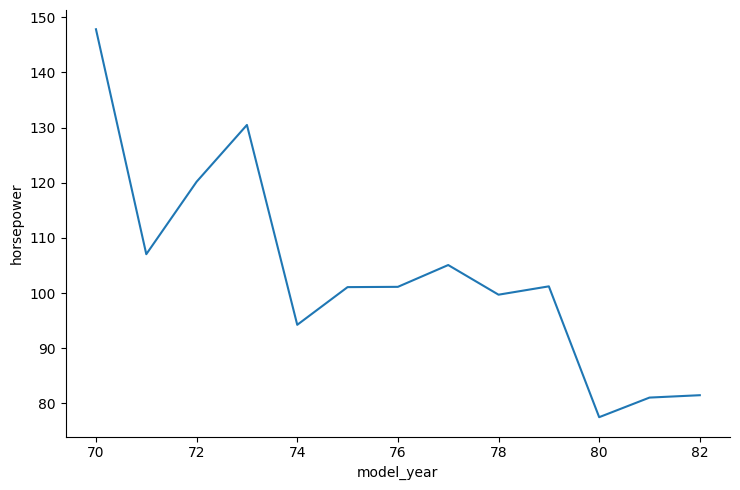

In [17]:
# Create line plot of model year vs. horsepower
sns.relplot(x="model_year", y="horsepower",
            data=mpg, kind="line", errorbar=None,
            height=5, aspect=1.5)

# Show plot
plt.show()

### Count plots
In this exercise, we'll return to exploring our dataset that contains the responses to a survey sent out to young people. We might suspect that young people spend a lot of time on the internet, but how much do they report using the internet each day? Let's use a count plot to break down the number of survey responses in each category and then explore whether it changes based on age.

As a reminder, to create a count plot, we'll use the `catplot()` function and specify the name of the categorical variable to count (`x=____`), the pandas DataFrame to use (`data=____`), and the type of plot (`kind="count"`).

In [55]:
# Load the survey data first
survey_data = pd.read_csv("data/young-people-survey-responses.csv")

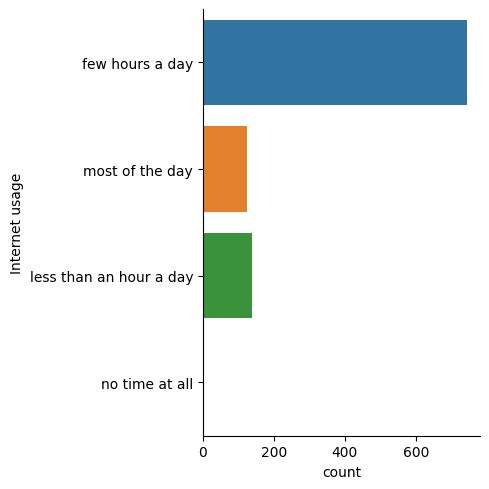

In [56]:
# Change the orientation of the plot
sns.catplot(y="Internet usage", data=survey_data,
            kind="count", hue="Internet usage")

# Show plot
plt.show()

### Bar plots with percentages
Let's continue exploring the responses to a survey sent out to young people. The variable "Interested in Math" is True if the person reported being interested or very interested in mathematics, and False otherwise. What percentage of young people report being interested in math, and does this vary based on gender? Let's use a bar plot to find out.

As a reminder, we'll create a bar plot using the `catplot()` function, providing the name of categorical variable to put on the x-axis (`x=____`), the name of the quantitative variable to summarize on the y-axis (`y=____`), the pandas DataFrame to use (`data=____`), and the type of categorical plot (`kind="bar"`).

In [57]:
survey_data.head()

,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city
3,3,5.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,2.0,most of the day,2.0,22.0,1.0,female,city
4,4,5.0,2.0,5.0,3.0,2.0,1.0,1.0,3.0,3.0,few hours a day,4.0,20.0,1.0,female,village


In [ ]:
# Separate this plot into two side-by-side column subplots based on "Age Category", which separates respondents into those that are younger than 21 vs. 21 and older.
survey_data["Age Category"] = survey_data["Age"].apply(lambda x: "Under 21" if x < 21 else "21 and Older")
display(survey_data.head())

In [ ]:
# Create the "Interested in math" column
# Define "Interested in math" as a rating of 4 or 5 in the 'Mathematics' column
survey_data['Interested in math'] = survey_data['Mathematics'].apply(lambda x: x in [4, 5])

# Display the head of the DataFrame with the new column
display(survey_data.head())

In [ ]:
# Create a bar plot of interest in math, separated by gender
sns.catplot(x="Gender", y="Interested in math",
            data=survey_data,
            kind="bar", hue="Gender")


# Show plot
plt.show()

In [ ]:
# Create bar plot of average final grade in each study category
sns.catplot(x="study_time",
            y="G3", kind="bar",
            data=student_data,
            hue="study_time")

# Show plot
plt.show()

In [ ]:
# Define a dictionary to map hue values ("smoker") to specific colors
hue_colors = {"Yes": "black",
"No": "red"}

# scatterplot(): Creates scatter plots for visualizing relationships between two continuous variables
# hue parameter: Colors points based on a categorical variable (smoker status)
# palette parameter: Custom color mapping using a dictionary for precise color control
sns.scatterplot(x="total_bill",
                y="tip",
                data=tips,       # Use the 'tips' DataFrame as the data source
                hue="smoker",    # Color the points based on the 'smoker' column
                palette=hue_colors) # Use the defined 'hue_colors' dictionary for coloring

plt.show()

### Using HTML hex color codes with hue


In [ ]:
# Define a dictionary to map hue values ("smoker") to specific HTML hex color codes
hue_colors = {"Yes": "#808080", # Grey color for "Yes"
"No": "#00FF00"} # Green color for "No"

# palette with hex colors: Using HTML hex color codes (#RRGGBB) for precise color specification
# Custom color mapping: More professional color control compared to basic color names
sns.scatterplot(x="total_bill",
                y="tip",
                data=tips,
                hue="smoker",    # Color the points based on the 'smoker' column
                palette=hue_colors) # Use the defined 'hue_colors' dictionary for coloring

plt.show()

In [ ]:
student_data.head()

## Visualizing Two Quantitative Variables

In this chapter, you will create and customize plots that visualize the relationship between two quantitative variables. To do this, you will use scatter plots and line plots to explore how the level of air pollution in a city changes over the course of a day and how horsepower relates to fuel efficiency in cars. You will also see another big advantage of using Seaborn - the ability to easily create subplots in a single figure!

In [ ]:
# Create a scatter plot using relplot
# relplot(): High-level interface for relational plots (scatter and line)
# col parameter: Creates separate subplot columns for each category
# row parameter: Creates separate subplot rows for each category
# Subplot grid: Automatically creates a 2x2 grid based on smoker (Yes/No) and time (Dinner/Lunch)
sns.relplot(x="total_bill", # Map total_bill to the x-axis
            y="tip",        # Map tip to the y-axis
            data=tips,      # Use the 'tips' DataFrame
            kind="scatter", # Create a scatter plot
            col="smoker",   # Create columns for each smoker category (Yes/No)
            row="time")     # Create rows for each time category (Dinner/Lunch)

plt.show()

In [ ]:
# col_wrap parameter: Wraps subplot columns after specified number (creates 2x2 grid instead of 1x4)
# col_order parameter: Controls the sequence in which categories appear in subplots
# Flexible subplot layout: Better space utilization for multiple categories
sns.relplot(x="total_bill",
            y="tip",
            data=tips,
            kind="scatter",
            col="day", # Create columns for each day of the week
            col_wrap=2, # Wrap the columns after 2 plots
            col_order=["Thur", # Specify the order of the columns
                       "Fri",
                       "Sat",
                       "Sun"])

plt.show()

In [ ]:
# col parameter: Creates separate plots for each study time category
# Automatic subplot arrangement: Seaborn handles layout and spacing automatically
# Comparative analysis: Easy to compare patterns across different groups
sns.relplot(x="absences", y="G3",
            data=student_data,
            kind="scatter",
            col="study_time")  # Creates 4 subplots for different study time categories

plt.show()

In [ ]:
# Combined col and row parameters: Creates a 2x2 grid (2 school support × 2 family support)
# col_order and row_order: Controls the arrangement of categories in the grid
# Multi-dimensional analysis: Examines relationships across two categorical variables simultaneously
sns.relplot(x="G1", y="G3",
            data=student_data,
            kind="scatter",
            col="schoolsup",           # Columns for school support (yes/no)
            col_order=["yes", "no"],
            row="famsup",              # Rows for family support (yes/no)
            row_order=["yes", "no"])
plt.show()

## Custmizing Scatter Plots

In [ ]:
# Load the air quality dataset containing NO2 pollution measurements
# This dataset includes air pollution data from different cities and time periods
air_quality = pd.read_csv("data/air_quality_no2_long.csv")

In [ ]:
air_quality.head()

In [ ]:
# Convert 'date.utc' to datetime objects and extract the hour
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'])
air_quality['hour'] = air_quality['date.utc'].dt.hour

# Group by hour and location and calculate the mean of 'value' (assuming 'value' is the NO_2 measurement)
air_df_mean = air_quality.groupby(['hour','location',"country"])['value'].mean().reset_index(name='NO_2_mean')

In [ ]:
air_df_mean.head()

In [ ]:
# kind="line": Creates line plots instead of scatter plots using relplot
# style parameter: Different line styles (solid, dashed, etc.) for each country
# hue parameter: Different colors for each country
# markers=True: Adds point markers to line plots for better visibility
# Time series visualization: Line plots are ideal for showing trends over time
sns.relplot(x="hour",
            y="NO_2_mean",
            data=air_df_mean,
            kind="line",      # Line plot for time series data
            style="country",  # Different line styles per country
            hue="country",    # Different colors per country
            markers=True)     # Add markers to lines
plt.show()

In [ ]:
# Change to create subgroups for country of origin
sns.relplot(x="model_year", y="horsepower",
            data=mpg, kind="line",
            errorbar=None,
            style="origin",
            hue="origin")
plt.show()

## Visualizing a Categorical and a Quantitative Variable

Categorical variables are present in nearly every dataset, but they are especially prominent in survey data. In this chapter, you will learn how to create and customize categorical plots such as box plots, bar plots, count plots, and point plots. Along the way, you will explore survey data from young people about their interests, students about their study habits, and adult men about their feelings about masculinity.

In [ ]:
# Separate into column subplots based on age category
sns.catplot(y="Internet usage", data=survey_data,
            kind="count",
            col="Age Category",
            hue="Internet usage") # Add hue to color bars by Internet usage category

# Show plot
plt.show()

### Bar plots with percentages

Let's continue exploring the responses to a survey sent out to young people. The variable "Interested in Math" is True if the person reported being interested or very interested in mathematics, and False otherwise. What percentage of young people report being interested in math, and does this vary based on gender? Let's use a bar plot to find out.

As a reminder, we'll create a bar plot using the catplot() function, providing the name of categorical variable to put on the x-axis (x=____), the name of the quantitative variable to summarize on the y-axis (y=____), the pandas DataFrame to use (data=____), and the type of categorical plot (kind="bar").

In [ ]:
sns.catplot(x="Gender",
            y="Interested in math",
            data=survey_data,
            kind="bar",
            hue="Gender") # Add hue to color bars by Gender
plt.show()

### Customizing bar plots

In this exercise, we'll explore data from students in secondary school. The "study_time" variable records each student's reported weekly study time as one of the following categories: "<2 hours", "2 to 5 hours", "5 to 10 hours", or ">10 hours". Do students who report higher amounts of studying tend to get better final grades? Let's compare the average final grade among students in each category using a bar plot.

In [ ]:
# Create bar plot of average final grade in each study category
sns.catplot(x="study_time",
            y="G3", kind="bar",
            data=student_data,
            hue="study_time")

# Show plot
plt.show()

In [ ]:
# List of categories from lowest to highest
category_order = ["<2 hours",
                  "2 to 5 hours",
                  "5 to 10 hours",
                  ">10 hours"]

# Rearrange the categories
sns.catplot(x="study_time", y="G3", order=category_order,
data=student_data, kind="bar", hue="study_time")

# Show plot
plt.show()

### Create and interpret a box plot

Let's continue using the student_data dataset. In an earlier exercise, we explored the relationship between studying and final grade by using a bar plot to compare the average final grade (`"G3"`) among students in different categories of `"study_time"`.

In this exercise, we'll try using a box plot look at this relationship instead. As a reminder, to create a box plot you'll need to use the `catplot()` function and specify the name of the categorical variable to put on the x-axis (`x=____`), the name of the quantitative variable to summarize on the y-axis (`y=____`), the pandas DataFrame to use (`data=____`), and the type of plot (`kind="box"`).

In [ ]:
# Specify the category ordering
study_time_order = ["<2 hours", "2 to 5 hours",
                    "5 to 10 hours", ">10 hours"]

# Create a box plot and set the order of the categories
sns.catplot(x="study_time",
            y="G3",
            data=student_data,
            kind="box",
            order=study_time_order,
            hue="study_time")

# Show plot
plt.show()

In [ ]:
# Create a box plot with subgroups and omit the outliers
sns.catplot(x="internet",
            y="G3",
            data=student_data,
            kind="box",
            showfliers=False,
            hue="location")

# Show plot
plt.show()

In [ ]:
# Set the whiskers to 0.5 * IQR

sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            hue="romantic",
            whis=0.5)

# Show plot
plt.show()

In [ ]:
# Extend the whiskers to the 5th and 95th percentile
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            hue="romantic",
            whis=[5, 95])

# Show plot
plt.show()

In [ ]:
# Set the whiskers at the min and max values
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[0, 100])

# Show plot
plt.show()

### Customizing point plots
Let's continue to look at data from students in secondary school, this time using a point plot to answer the question: does the quality of the student's family relationship influence the number of absences the student has in school? Here, we'll use the `"famrel"` variable, which describes the quality of a student's family relationship from 1 (very bad) to 5 (very good).

As a reminder, to create a point plot, use the `catplot()` function and specify the name of the categorical variable to put on the x-axis (`x=____`), the name of the quantitative variable to summarize on the y-axis (`y=____`), the pandas DataFrame to use (`data=____`), and the type of categorical plot (`kind="point"`).

In [ ]:
# Create a point plot of family relationship vs. absences
sns.catplot(x="famrel",
            y="absences",
            data=student_data,
            kind="point")

# Show plot
plt.show()

In [ ]:
# Add caps to the confidence interval
sns.catplot(x="famrel", y="absences",
            data=student_data,
            kind="point",
            capsize=0.2)


# Show plot
plt.show()

In [ ]:
# Remove the lines joining the points
sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point",
            capsize=0.2,
            linestyle="none")

# Show plot
plt.show()

Let's continue exploring the dataset of students in secondary school. This time, we'll ask the question: is being in a romantic relationship associated with higher or lower school attendance? And does this association differ by which school the students attend? Let's find out using a point plot.

In [ ]:
# Turn off the confidence intervals for this plot
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            errorbar=None)

# Show plot
plt.show()

### Changing style and palette
Let's return to our dataset containing the results of a survey given to young people about their habits and preferences. We've provided the code to create a count plot of their responses to the question "How often do you listen to your parents' advice?". Now let's change the style and palette to make this plot easier to interpret.


In [ ]:
# Apply a lambda function to the 'Parents' advice' column to map numerical values to descriptive strings
survey_data["Parents' advice"] = survey_data["Parents' advice"].apply(lambda x: "Never" if x == 1 else ("Rarely" if x == 2 else ("Sometimes" if x == 3 else ("Often" if x == 4 else "Always"))))

# Rename the 'Parents' advice' column to 'Parents Advice Category'
survey_data.rename(columns={"Parents' advice": "Parents Advice"}, inplace=True)

display(survey_data.head())

In [ ]:
# # Set the style to "whitegrid"
sns.set_style("whitegrid")
sns.set_palette("Purples")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes",
                  "Often", "Always"]

sns.catplot(x="Parents Advice",
            data=survey_data,
            kind="count",
            order=category_order,
            hue="Parents Advice")

plt.show()

In [ ]:
# # Change the color palette to "RdBu"
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes",
                  "Often", "Always"]

sns.catplot(x="Parents Advice",
            data=survey_data,
            kind="count",
            order=category_order,
            hue="Parents Advice")

# Show plot
plt.show()

In [ ]:
# 1. Define the per-group probability of feeling lonely
probabilities = {
    "0": 0.28,
    "1 - 2": 0.265,
    "3+": 0.29
}

# 2. Map each row’s sibling category to its probability (fall back to the mean if unexpected)
row_probs = (
    survey_data["Siblings"]
    .astype(str)
    .map(probabilities)
    .fillna(np.mean(list(probabilities.values())))
)

# 3. Perform a Bernoulli trial for each row
random_values = np.random.rand(len(survey_data))
survey_data["Feels Lonely"] = random_values < row_probs

In [ ]:
# Set the context to "paper"
sns.set_context("notebook")

# Create bar plot
sns.catplot(x="Siblings", y="Feels Lonely",
            data=survey_data, kind="bar", hue="Siblings")

# Show plot
plt.show()

In [ ]:
# Set the context to "paper"
sns.set_context("paper")

# Create bar plot
sns.catplot(x="Siblings", y="Feels Lonely",
            data=survey_data, kind="bar", hue="Siblings")

# Show plot
plt.show()

In [ ]:
# Set the context to "poster"
sns.set_context("poster")

# Create bar plot
sns.catplot(x="Siblings", y="Feels Lonely",
            data=survey_data, kind="bar", hue="Siblings",
            height=6, aspect=1.5) # Added height and aspect for better layout

# Show plot
plt.show()

In [ ]:
# Set the style to "darkgrid"
sns.set_style("darkgrid")
sns.set_context("notebook")

# Set a custom color palette
custom_palette = ["#39A7D0", "#36ADA4"]

sns.set_palette(custom_palette)

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age",
            data=survey_data, kind="box", hue="Gender")

# Show plot
plt.show()

**FacetGrid**

- **Level**: Figure-level  
- **Primary functions**: `relplot()`, `catplot()`, `displot()`, `histplot()`, `ecdfplot()`  
- **Returned object**: `FacetGrid`  
- **Key characteristics**:  
  - Builds a grid of subplots based on `row`, `col` and/or `hue`.  
  - Apply axes-level plots via `.map()` or `.map_dataframe()`.  
  - Methods available: `.set_axis_labels()`, `.add_legend()`, `.set_titles()`, and access to `.fig` for layout control.

**PairGrid**

- **Level**: Figure-level  
- **Primary functions**: `pairplot()`, direct via `PairGrid(data, ...)`  
- **Returned object**: `PairGrid`  
- **Key characteristics**:  
  - Matrix of axes for every pairwise variable combination.  
  - Assign plots with `.map_upper()`, `.map_lower()`, `.map_diag()`.  
  - Fine-grained control over individual cells.

**JointGrid**

- **Level**: Figure-level  
- **Primary functions**: `jointplot(kind='scatter'|'hex'|'kde'|'hist'|'reg')`, direct via `JointGrid()`  
- **Returned object**: `JointGrid`  
- **Key characteristics**:  
  - Central bivariate plot with marginal distributions on top and right.  
  - Configure sections using `.plot_joint()` and `.plot_marginals()`.  
  - Annotation with `.annotate()`, axis labels via `.set_axis_labels()`, and legend management.

**AxesSubplot**

- **Level**: Axes-level  
- **Primary functions**: `scatterplot()`, `lineplot()`, `histplot()`, `kdeplot()`, `boxplot()`, `violinplot()`, `barplot()`, `countplot()`, `heatmap()`, etc.  
- **Returned object**: Matplotlib’s `AxesSubplot`  
- **Key characteristics**:  
  - Single axes for precise layering and annotation.  
  - Chain Matplotlib methods: `.set_title()`, `.set_xlabel()`, `.invert_xaxis()`, `.tick_params()`, `.legend()`.  
  - Ideal for detailed styling or combining multiple plot types on the same axes.

Use figure-level APIs for automated faceting with high-level parameters (`hue`, `row`, `col`, `height`, `aspect`). Opt for axes-level functions when you need detailed control over an individual plot or wish to layer multiple elements on one axes.  


### FacetGrids vs. AxesSubplots
In the recent lesson, we learned that Seaborn plot functions create two different types of objects: `FacetGrid` objects and `AxesSubplot` objects. The method for adding a title to your plot will differ depending on the type of object it is.

In the code provided, we've used `relplot()` with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This scatter plot is assigned to the variable name g. Let's identify which type of object it is.

In [ ]:
# Create scatter plot
g = sns.relplot(x="weight",
                y="horsepower",
                data=mpg,
                kind="scatter")

# Identify plot type
type_of_g = type(g)

# Print type
print(type_of_g)

In [ ]:
# Set a different palette and a different style
g = sns.color_palette("dark:#5A9_r", as_cmap=True)
g = sns.set_style("whitegrid")

# Create scatter plot
g = sns.relplot(x="weight",
                y="horsepower",
                data=mpg,
                kind="scatter",
                hue="weight")

# Add a title "Car Weight vs. Horsepower" and move it upwards
g.fig.suptitle("Car Weight vs. Horsepower", y=1.02)

# Show plot
plt.show()

### Adding a title and axis labels
Let's continue to look at the miles per gallon dataset. This time we'll create a line plot to answer the question: How does the average miles per gallon achieved by cars change over time for each of the three places of origin? To improve the readability of this plot, we'll add a title and more informative axis labels.

In the code provided, we create the line plot using the `lineplot()` function. Note that `lineplot()` does not support the creation of subplots, so it returns an AxesSubplot object instead of an FacetGrid object.

In [ ]:
mpg_mean = mpg.groupby(["model_year", "origin"])["mpg"].mean().reset_index(name='mpg_mean')
display(mpg_mean.head())

In [ ]:
# Set default seaborn color palette
sns.color_palette("tab10")

# Create line plot
g = sns.lineplot(x="model_year", y="mpg_mean",
                 data=mpg_mean,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Show plot
plt.show()

In [ ]:
# Create line plot
g = sns.lineplot(x="model_year", y="mpg_mean",
                 data=mpg_mean,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Add x-axis and y-axis labels
g.set(xlabel="Car Model Year", ylabel="Average MPG")


# Show plot
plt.show()

### Rotating x-tick labels
In this exercise, we'll continue looking at the miles per gallon dataset. In the code provided, we create a point plot that displays the average acceleration for cars in each of the three places of origin. Note that the "acceleration" variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

Let's use this plot to practice rotating the x-tick labels. Recall that the function to rotate x-tick labels is a standalone Matplotlib function and not a function applied to the plot object itself.

In [ ]:
# Create point plot
sns.catplot(x="origin",
            y="acceleration",
            data=mpg,
            kind="point",
            linestyle="none",
            capsize=0.1)

# Rotate x-tick labels
plt.xticks(rotation=90)

# Show plot
plt.show()

### Box plot with subgroups
In this exercise, we'll look at the dataset containing responses from a survey given to young people. One of the questions asked of the young people was: "Are you interested in having pets?" Let's explore whether the distribution of ages of those answering "yes" tends to be higher or lower than those answering "no", controlling for gender.

In [ ]:
# Set palette to "Blues"
sns.set_palette("Blues")

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=survey_data,
                kind="box", hue="Pets")

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle("Age of Those Interested in Pets vs. Not")

# Show plot
plt.show()

### Bar plot with subgroups and subplots
In this exercise, we'll return to our young people survey dataset and investigate whether the proportion of people who like techno music (`"Likes Techno"`) varies by their gender (`"Gender"`) or where they live (`"Village - town"`). This exercise will give us an opportunity to practice the many things we've learned throughout this course!

In [ ]:
# Set the figure style to "dark"
sns.set_style("dark")

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Techno",
                data=survey_data, kind="bar",
                col="Gender",
                palette="magma") # Pass the palette directly to catplot

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence",
       ylabel="% Who Like Techno")

# Show plot
plt.show()

In [ ]:
# Read the raw content of the student-mat.csv file
with open('data/student-mat.csv', 'r', encoding='utf-8') as f:
    # Print the first 20 lines to inspect the format
    for i in range(20):
        print(f.readline())













<!DOCTYPE html>

<html

  lang="en"

  

  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"

  data-a11y-animated-images="system" data-a11y-link-underlines="true"

  

  >







  <head>

    <meta charset="utf-8">

  <link rel="dns-prefetch" href="https://github.githubassets.com">

